Mamadou Billo Diallo

#COMPREHENSION DES DONNÉES

voici ci-dessous les informations générales de notre dataset

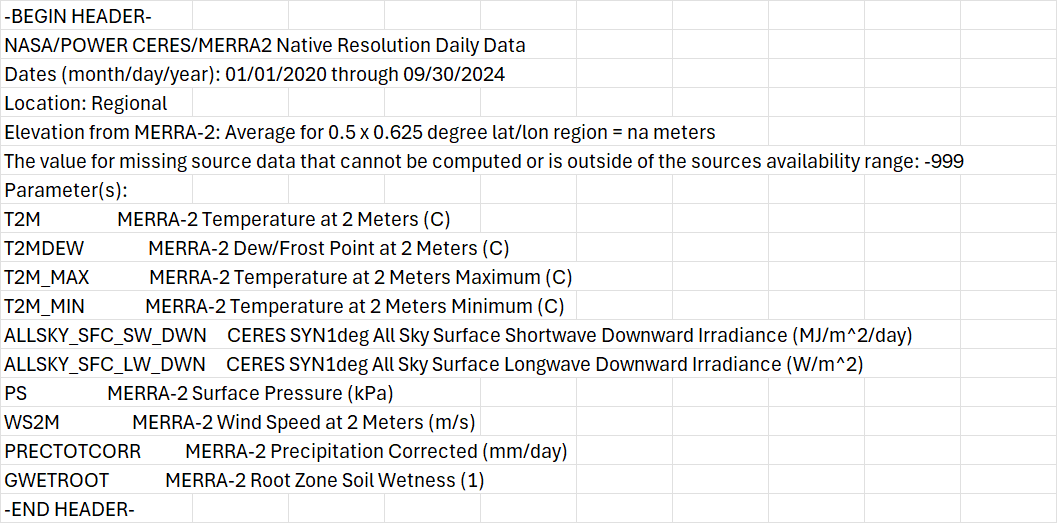

Préparation des données



In [6]:
#Librairie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import *
from sklearn.compose import *

In [ ]:
#chargons les données des 5 années de  2020/01/01 à 2024/09/30
data1=pd.read_csv("/content/1_POWER_Regional_Daily_20240101_20240930.csv",na_values=[-999])
data2=pd.read_csv("/content/2_POWER_Regional_Daily_20230101_20231231.csv",na_values=[-999])
data3=pd.read_csv("/content/3_POWER_Regional_Daily_20220101_20221201.csv",na_values=[-999])
data4=pd.read_csv("/content/4_POWER_Regional_Daily_20210101_20211231.csv",na_values=[-999])
data5=pd.read_csv("/content/5_POWER_Regional_Daily_20200101_20201231.csv",na_values=[-999])



on a spécifié que partout il y'aura -999 dans notre dataset de le considéré comme une valeur manquante

In [ ]:
#on va utiliser la fonction concat et une liste pour pouvoir effectuer le regroupement de toutes
#les bases de données des 10ans en une seule base de donnée.

def superpositon(dataframes: list):
    # Utiliser pd.concat pour empiler les datasets les uns sur les autres
    data_superpose = pd.concat(dataframes, ignore_index=True)
    return data_superpose

In [ ]:
# On crée la liste de datasets
dataframes = [ data5, data4, data3, data2, data1]

# appel de la fonction
df = superpositon(dataframes)


In [ ]:
df

,LAT,LON,YEAR,DOY,T2M,T2MDEW,T2M_MAX,T2M_MIN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,PS,WS2M,PRECTOTCORR,GWETROOT
0,10.25,-13.25,2020,1,24.87,11.90,33.43,17.74,20.67,360.43,98.03,1.61,0.00,0.53
1,10.25,-12.75,2020,1,24.53,8.15,34.17,16.60,21.14,327.40,97.20,1.98,0.00,0.54
2,10.25,-12.25,2020,1,23.35,6.59,33.13,15.52,21.14,327.40,96.19,2.45,0.00,0.54
3,10.25,-11.75,2020,1,21.30,7.34,30.44,13.88,21.47,315.98,95.10,2.67,0.00,0.53
4,10.25,-11.25,2020,1,19.97,8.64,28.90,11.97,21.47,315.98,95.09,2.31,0.00,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55515,11.75,-11.75,2024,274,24.65,22.27,28.40,21.43,16.71,415.40,94.77,1.40,3.64,NaN
55516,11.75,-11.25,2024,274,25.08,22.39,28.75,21.83,16.71,415.40,95.20,1.41,3.07,NaN
55517,11.75,-10.75,2024,274,25.55,22.63,29.42,22.00,20.66,423.88,95.84,1.37,2.84,NaN
55518,11.75,-10.25,2024,274,25.66,22.76,29.48,21.93,20.66,423.88,96.12,1.38,2.91,NaN


In [ ]:
df.to_csv('df.csv', index=False)


In [ ]:
df=pd.read_csv("/content/df.csv")


Maintenant notre dataset est bien rassemblé comme on le souhaite.

In [ ]:
#pour connaitre les dimensions de notre datasets
df.shape

(55520, 14)

on a 44416 lignes dans notre et 14 variables.

In [ ]:
df.head()

,LAT,LON,YEAR,DOY,T2M,T2MDEW,T2M_MAX,T2M_MIN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,PS,WS2M,PRECTOTCORR,GWETROOT
0,10.25,-13.25,2020,1,24.87,11.90,33.43,17.74,20.67,360.43,98.03,1.61,0.0,0.53
1,10.25,-12.75,2020,1,24.53,8.15,34.17,16.60,21.14,327.40,97.20,1.98,0.0,0.54
2,10.25,-12.25,2020,1,23.35,6.59,33.13,15.52,21.14,327.40,96.19,2.45,0.0,0.54
3,10.25,-11.75,2020,1,21.30,7.34,30.44,13.88,21.47,315.98,95.10,2.67,0.0,0.53
4,10.25,-11.25,2020,1,19.97,8.64,28.90,11.97,21.47,315.98,95.09,2.31,0.0,0.56


In [ ]:
#on vérifié nos variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55520 entries, 0 to 55519
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAT                55520 non-null  float64
 1   LON                55520 non-null  float64
 2   YEAR               55520 non-null  int64  
 3   DOY                55520 non-null  int64  
 4   T2M                55424 non-null  float64
 5   T2MDEW             55424 non-null  float64
 6   T2M_MAX            55424 non-null  float64
 7   T2M_MIN            55424 non-null  float64
 8   ALLSKY_SFC_SW_DWN  55520 non-null  float64
 9   ALLSKY_SFC_LW_DWN  55520 non-null  float64
 10  PS                 55424 non-null  float64
 11  WS2M               55424 non-null  float64
 12  PRECTOTCORR        55424 non-null  float64
 13  GWETROOT           52608 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 5.9 MB


In [ ]:
#on va essayer de comprendre les statistiques de nos données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LAT,55520.0,11.000000,0.559022,10.25,10.6250,11.00,11.3750,11.75
LON,55520.0,-11.500000,1.145654,-13.25,-12.3750,-11.50,-10.6250,-9.75
YEAR,55520.0,2021.893948,1.372968,2020.00,2021.0000,2022.00,2023.0000,2024.00
DOY,55520.0,175.919885,103.085622,1.00,87.0000,174.00,261.0000,366.00
T2M,55424.0,25.960243,2.772404,17.53,23.9500,25.24,27.9300,36.24
T2MDEW,55424.0,16.903887,6.648823,-8.34,12.7000,20.18,22.0400,25.17
T2M_MAX,55424.0,31.947039,4.533371,21.70,28.2900,30.61,35.8825,45.20
T2M_MIN,55424.0,20.856558,2.512726,9.81,19.7275,21.30,22.4700,28.85
ALLSKY_SFC_SW_DWN,55520.0,20.106178,3.826628,1.25,17.8100,20.88,22.8300,28.27
ALLSKY_SFC_LW_DWN,55520.0,387.784214,28.920877,266.20,372.6850,396.07,407.6000,451.89


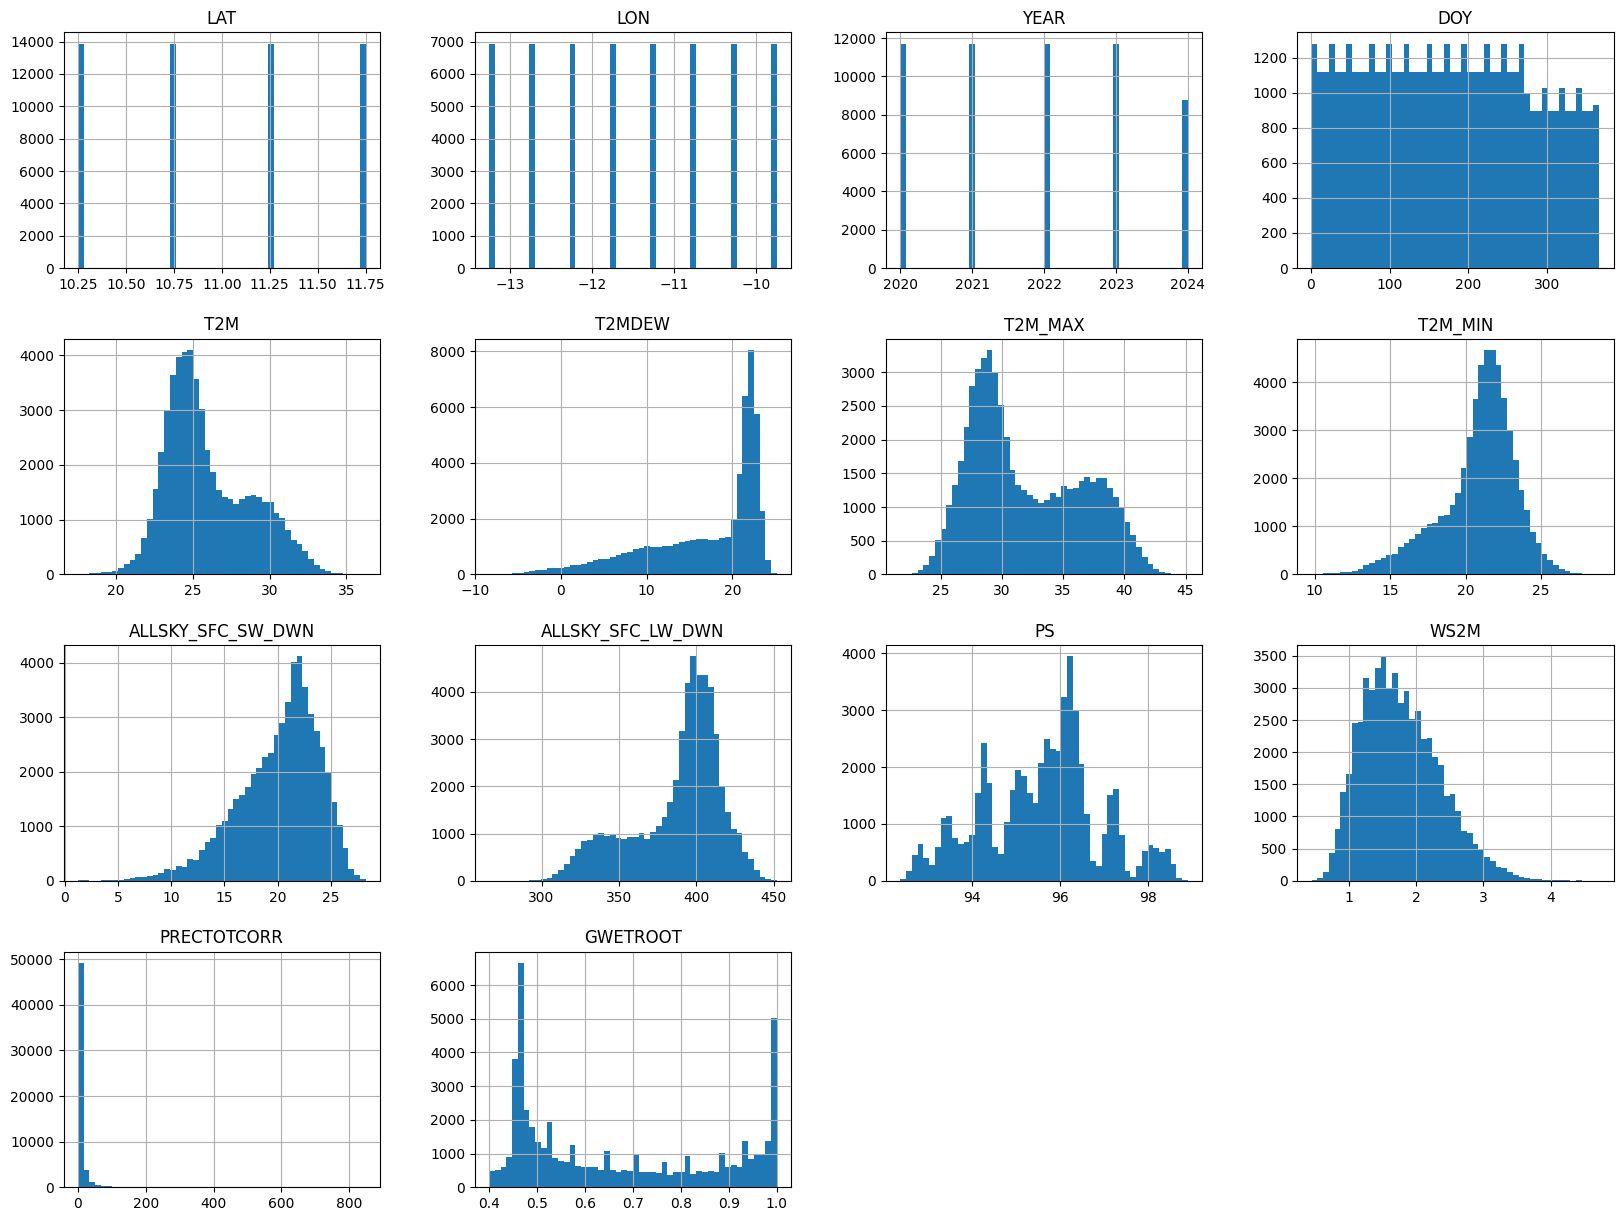

In [ ]:
#on va faire une visualisation pour mieux comprendre nos donées
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


Interprétation des Tendances Temporelles
Température (T2M, T2M_MAX, T2M_MIN) : Les tendances annuelles montrent des oscillations régulières, ce qui est typique des variations saisonnières. Ces oscillations indiquent probablement des hausses en saison sèche et des baisses en saison des pluies.
Précipitations (PRECTOTCORR) : Les précipitations suivent une tendance marquée, avec des pics durant certaines périodes de l'année, ce qui est caractéristique de la saison des pluies en Guinée.
Humidité du Sol (GWETROOT) : L'humidité montre des tendances liées aux précipitations, avec des augmentations durant la saison des pluies et des baisses en saison sèche.
Vitesse du Vent (WS2M) : La tendance temporelle est plus stable, avec des variations modérées.

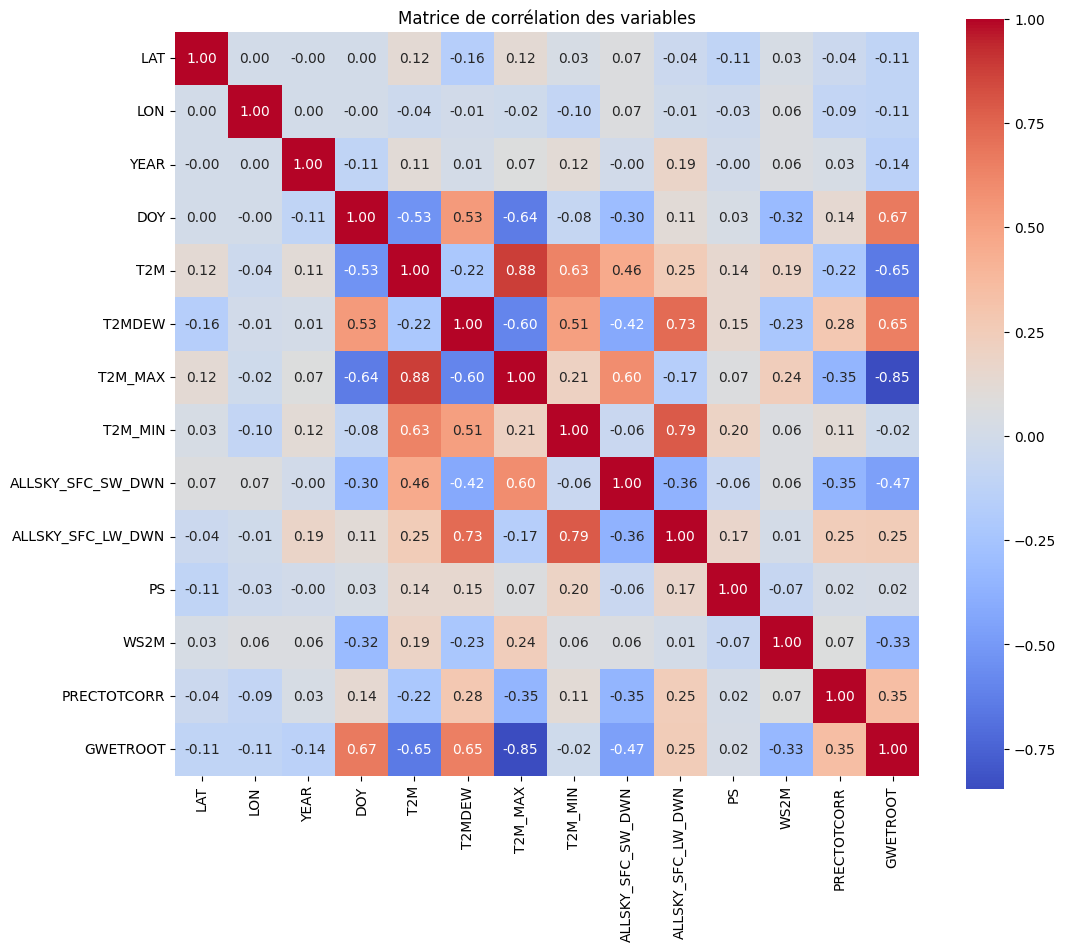

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matrice de corrélation des variables")
plt.show()


Voici la matrice de corrélation des variables :

Corrélations fortes :

T2M (température moyenne) est fortement corrélée avec T2M_MAX (température maximale) et T2M_MIN (température minimale), ce qui est attendu car elles mesurent des aspects similaires de la température.
T2MDEW (point de rosée) présente une corrélation élevée avec T2M, indiquant une relation entre la température et le niveau d’humidité.
DOY (jour de l'année) est modérément corrélé avec GWETROOT (humidité du sol), suggérant une possible variation saisonnière de l'humidité du sol.
Autres relations intéressantes :

ALLSKY_SFC_LW_DWN (radiation descendante de longueurs d'onde) montre une forte corrélation avec T2M et T2MDEW, probablement liée à l’effet de la radiation sur la température.
PRECTOTCORR (précipitations totales) a des corrélations faibles avec la plupart des autres variables, ce qui est fréquent car les précipitations peuvent être influencées par des facteurs externes non mesurés ici.

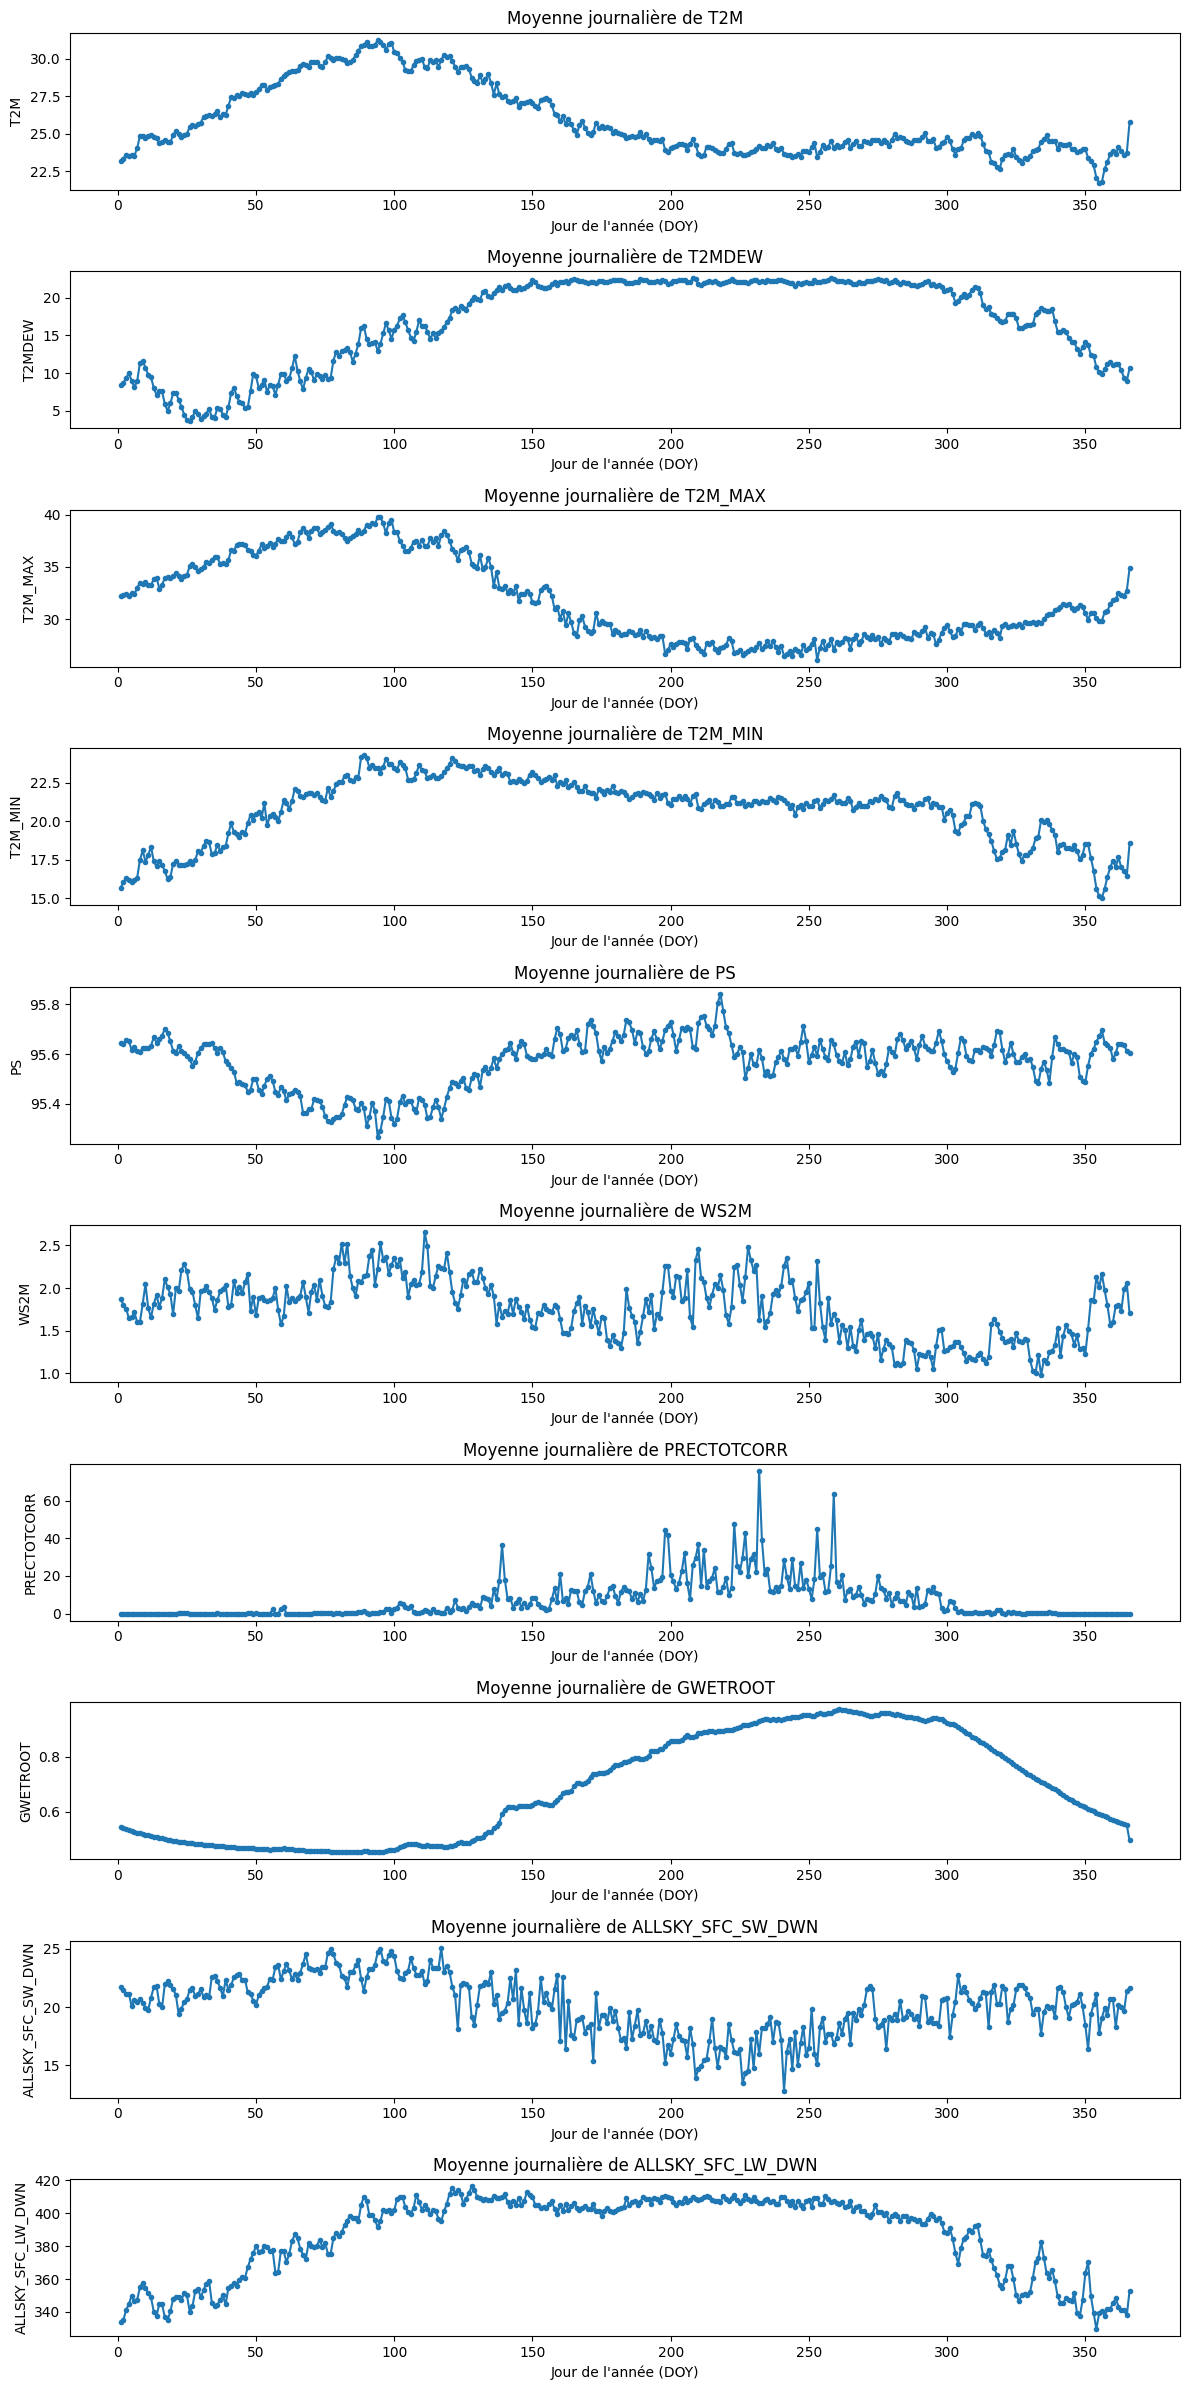

In [ ]:
df_doy = df[['DOY', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'PS',
             'WS2M', 'PRECTOTCORR', 'GWETROOT', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']]
# Calculer les moyennes journalières pour toutes les variables
daily_trends_all = df_doy.groupby('DOY').mean()

# Créer des visualisations pour toutes les variables par jour
plt.figure(figsize=(12, 24))
# Variables à tracer
variables = daily_trends_all.columns
num_vars = len(variables)

# Tracer chaque variable sur un sous-graphique
for i, var in enumerate(variables, 1):
    plt.subplot(num_vars, 1, i)
    daily_trends_all[var].plot(marker='.')
    plt.title(f"Moyenne journalière de {var}")
    plt.xlabel("Jour de l'année (DOY)")
    plt.ylabel(var)

# Ajuster la mise en page
plt.tight_layout()
plt.show()


Voici les moyennes journalières pour chaque variable sur l'ensemble de l'année (par jour de l'année, DOY). Ces graphiques permettent d'observer en détail les fluctuations quotidiennes de chaque variable :

Températures et point de rosée : On peut voir des changements progressifs, révélant une variabilité plus fine que les moyennes mensuelles.
Radiations solaires et précipitations : Les tendances journalières montrent plus de variabilité, en particulier dans la radiation solaire qui pourrait fluctuer en raison de la couverture nuageuse.
Vitesse du vent et pression : Affichent également des variations journalières qui suivent un schéma plus régulier.

In [ ]:
# Add a 'Month' column based on DOY for grouping
df['Date'] = pd.to_datetime(df['YEAR'] * 1000 + df['DOY'], format='%Y%j')
df['Month'] = df['Date'].dt.month
df_Month = df[['Month', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN',
               'PS', 'WS2M', 'PRECTOTCORR', 'GWETROOT', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']]


# Calculer les moyennes mensuelles pour toutes les variables disponibles
monthly_trends_all = df_Month.groupby('Month').mean()

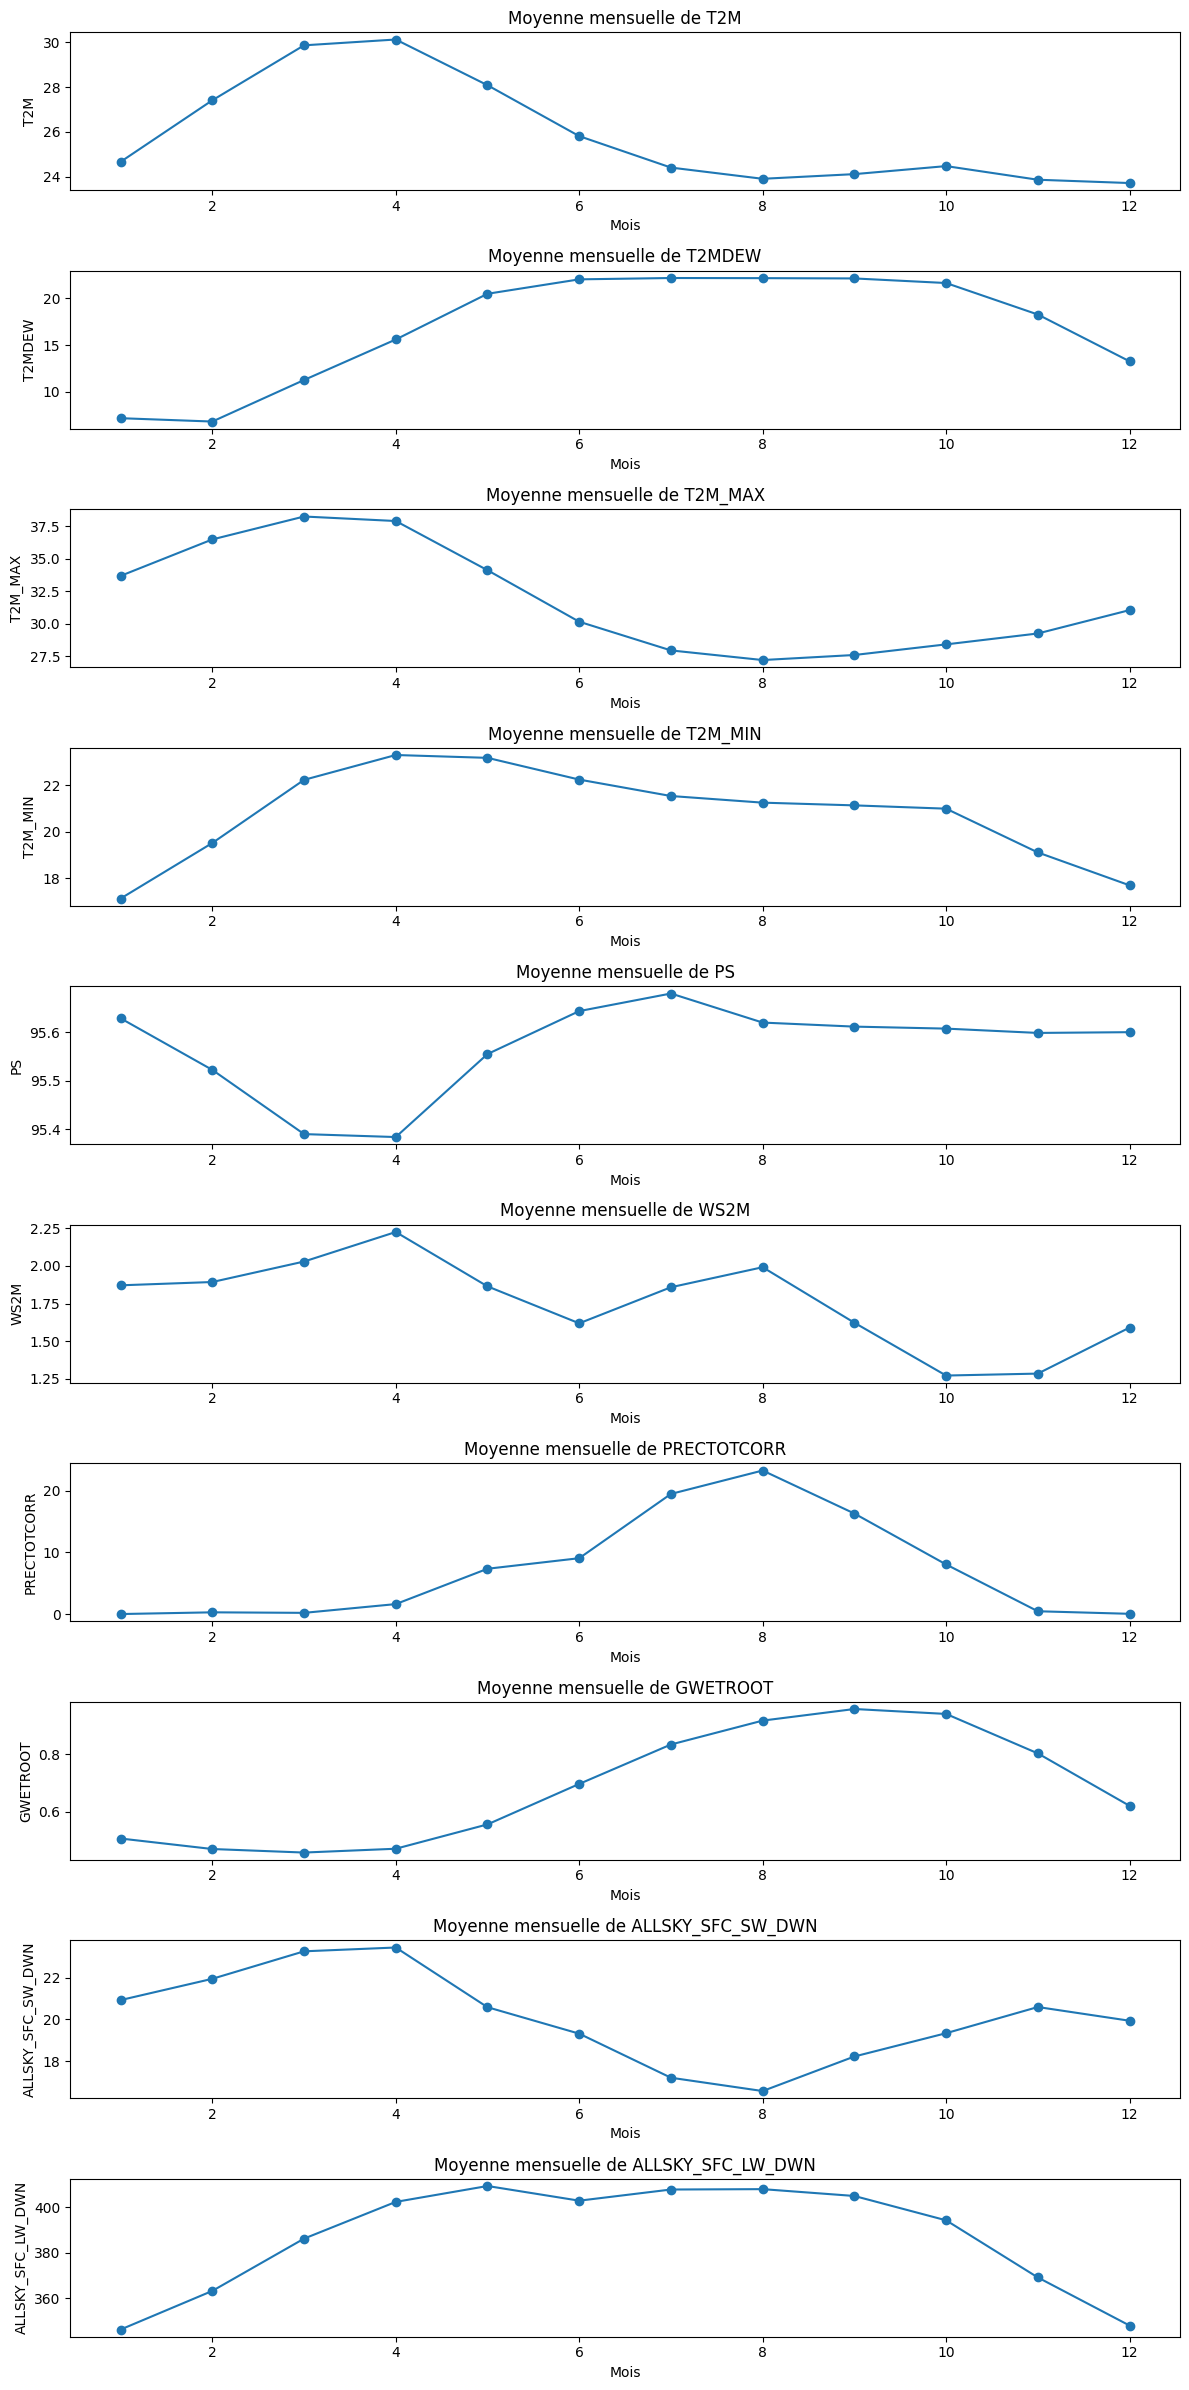

In [ ]:


# Créer des visualisations pour toutes les variables par mois
plt.figure(figsize=(12, 24))

# Variables à tracer
variablesM = monthly_trends_all.columns
num_vars = len(variablesM)

# Tracer chaque variable sur un sous-graphique
for i, var in enumerate(variablesM, 1):
    plt.subplot(num_vars, 1, i)
    monthly_trends_all[var].plot(marker='o')
    plt.title(f"Moyenne mensuelle de {var}")
    plt.xlabel("Mois")
    plt.ylabel(var)

# Ajuster la mise en page
plt.tight_layout()
plt.show()


Voici les moyennes mensuelles pour toutes les variables du jeu de données. Les graphes montrent les variations de chaque variable au cours des mois, permettant d'observer des tendances saisonnières :

Température (T2M, T2M_MAX, T2M_MIN) : Des variations claires avec des températures plus élevées au milieu de l'année.
Point de rosée (T2MDEW) et Humidité du sol (GWETROOT) : Augmentation durant la saison des pluies.
Radiations solaires (ALLSKY_SFC_SW_DWN, ALLSKY_SFC_LW_DWN) : Diminution en milieu d'année, possiblement due à la couverture nuageuse pendant la saison des pluies.
Précipitations (PRECTOTCORR) : Pic pendant la saison des pluies (mois d'été).
Vitesse du vent (WS2M) et Pression de surface (PS) : Présentent également des variations saisonnières légères.

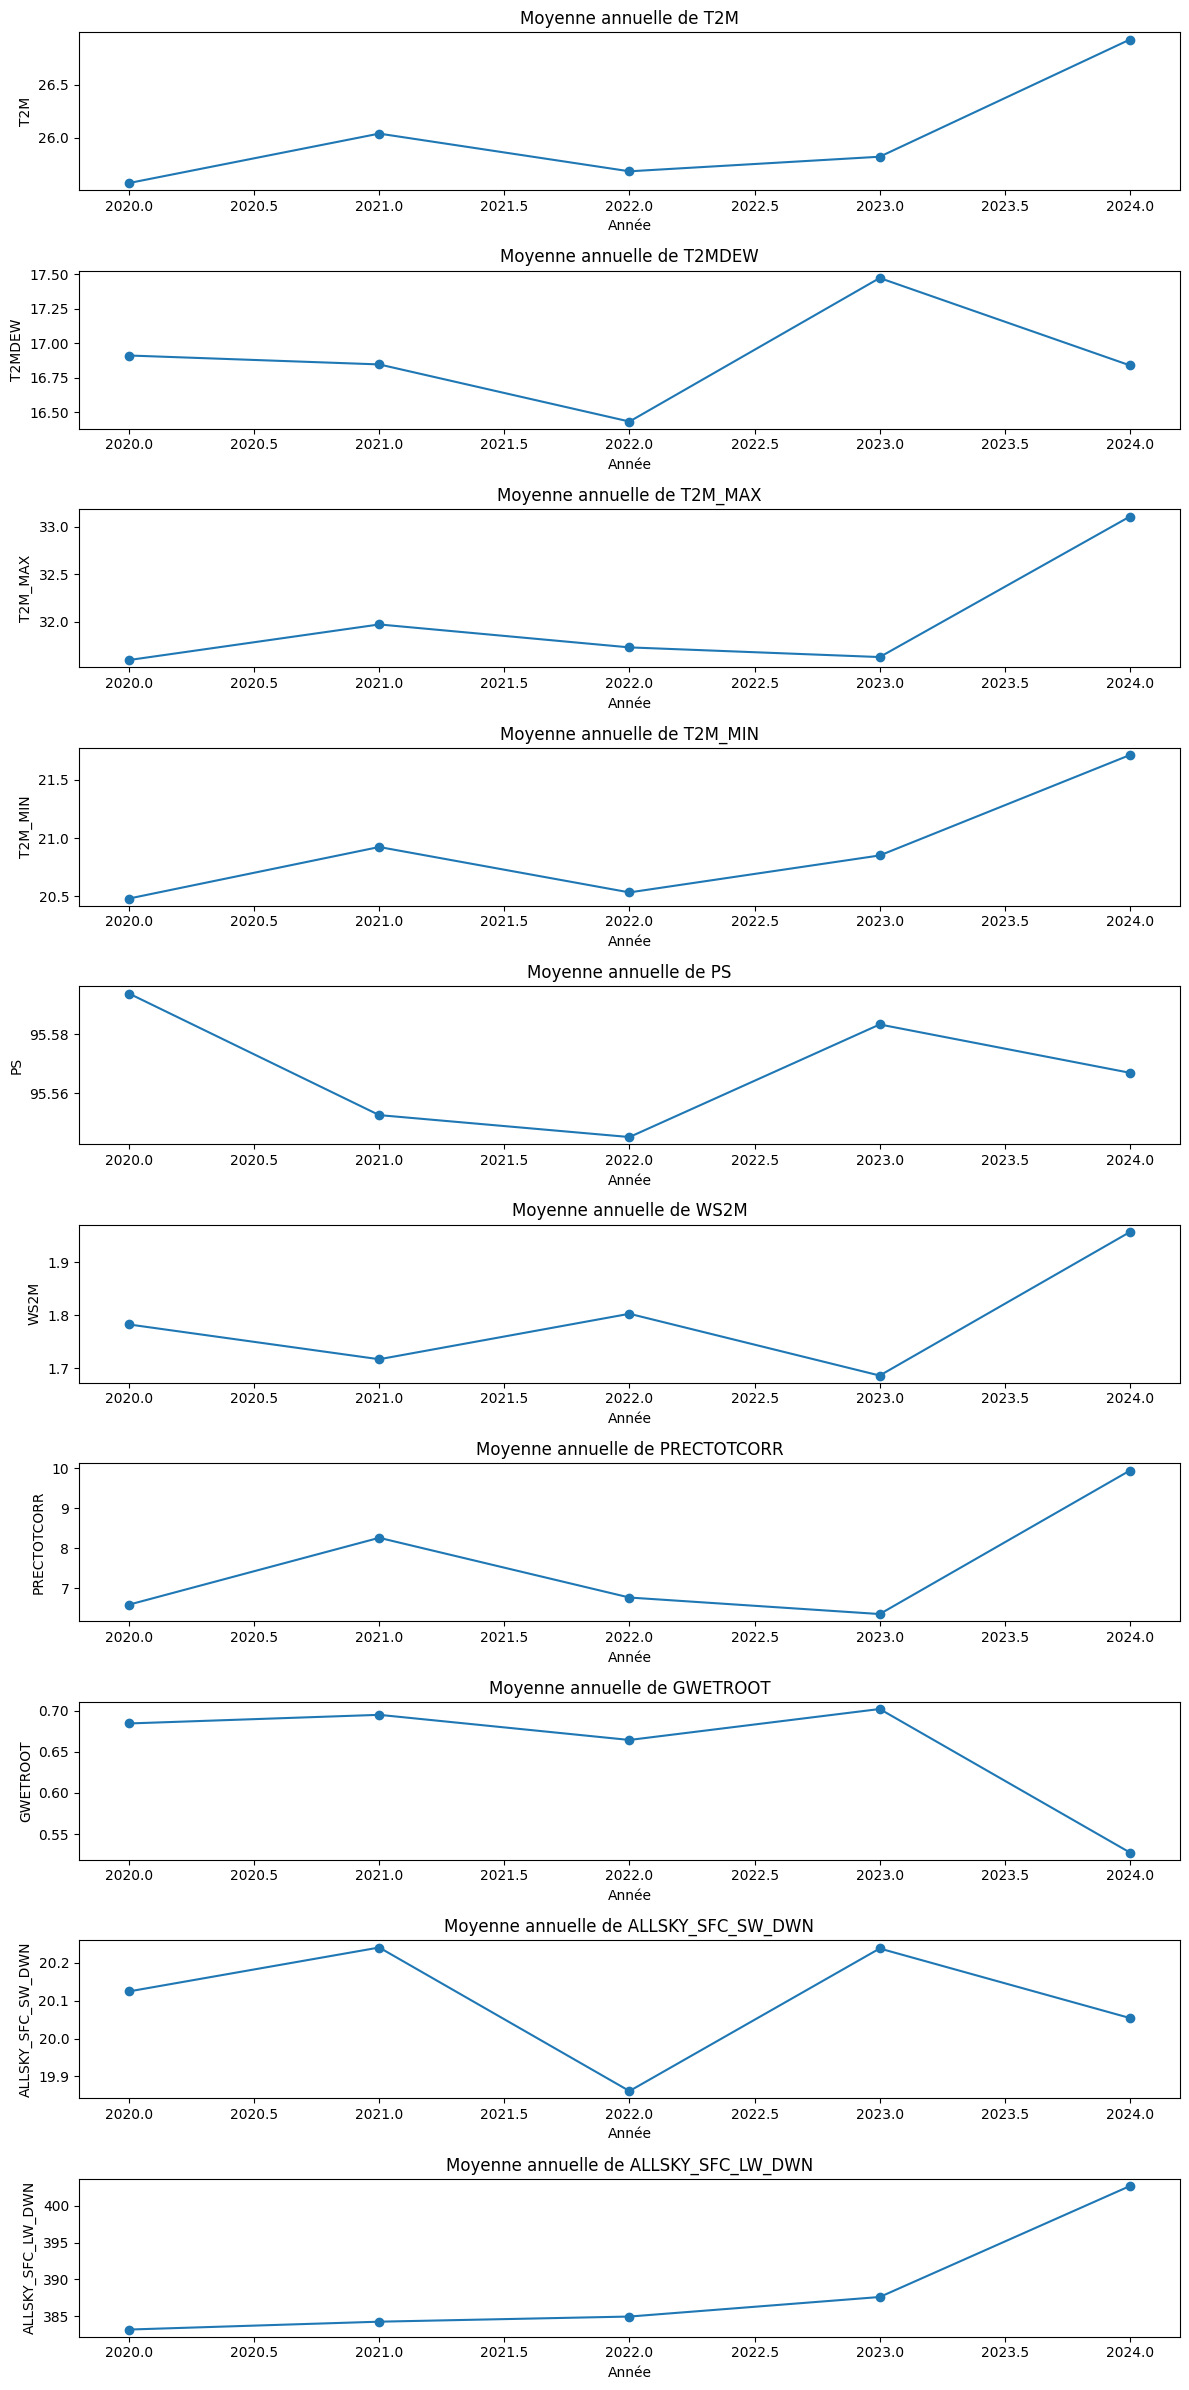

In [ ]:
df_year = df[['YEAR', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN',
              'PS', 'WS2M', 'PRECTOTCORR', 'GWETROOT', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']]
# Calculer les moyennes annuelles pour toutes les variables
annual_trends_all = df_year.groupby('YEAR').mean()
variablesA = annual_trends_all.columns
var = len(variablesA)
# Créer des visualisations pour toutes les variables par année
plt.figure(figsize=(12, 24))

# Tracer chaque variable sur un sous-graphique
for i, var in enumerate(variablesA, 1):
    plt.subplot(num_vars, 1, i)
    annual_trends_all[var].plot(marker='o')
    plt.title(f"Moyenne annuelle de {var}")
    plt.xlabel("Année")
    plt.ylabel(var)

# Ajuster la mise en page
plt.tight_layout()
plt.show()


Voici les moyennes annuelles pour chaque variable du jeu de données. Ces graphiques montrent les tendances au fil des ans pour chaque variable :

Températures (T2M, T2M_MAX, T2M_MIN) : Les variations sont cohérentes d'année en année, mais certaines années peuvent être légèrement plus chaudes ou plus fraîches.
Précipitations (PRECTOTCORR) : Les précipitations peuvent montrer des différences d'une année à l'autre, ce qui pourrait indiquer des variations climatiques saisonnières.
Radiation solaire et pression de surface (ALLSKY_SFC_SW_DWN, PS) : Certaines fluctuations annuelles sont visibles, en lien avec les conditions météorologiques.

In [ ]:
#créons la variable saison
def assign_season_by_month(month):
    if 5 <= month <= 10:
        return 'Saison_pluies'
    else:
        return 'Saison_seche'

# Appliquer la fonction pour créer la colonne 'Saison' en utilisant 'Month'
df['Saison'] = df['Month'].apply(assign_season_by_month)



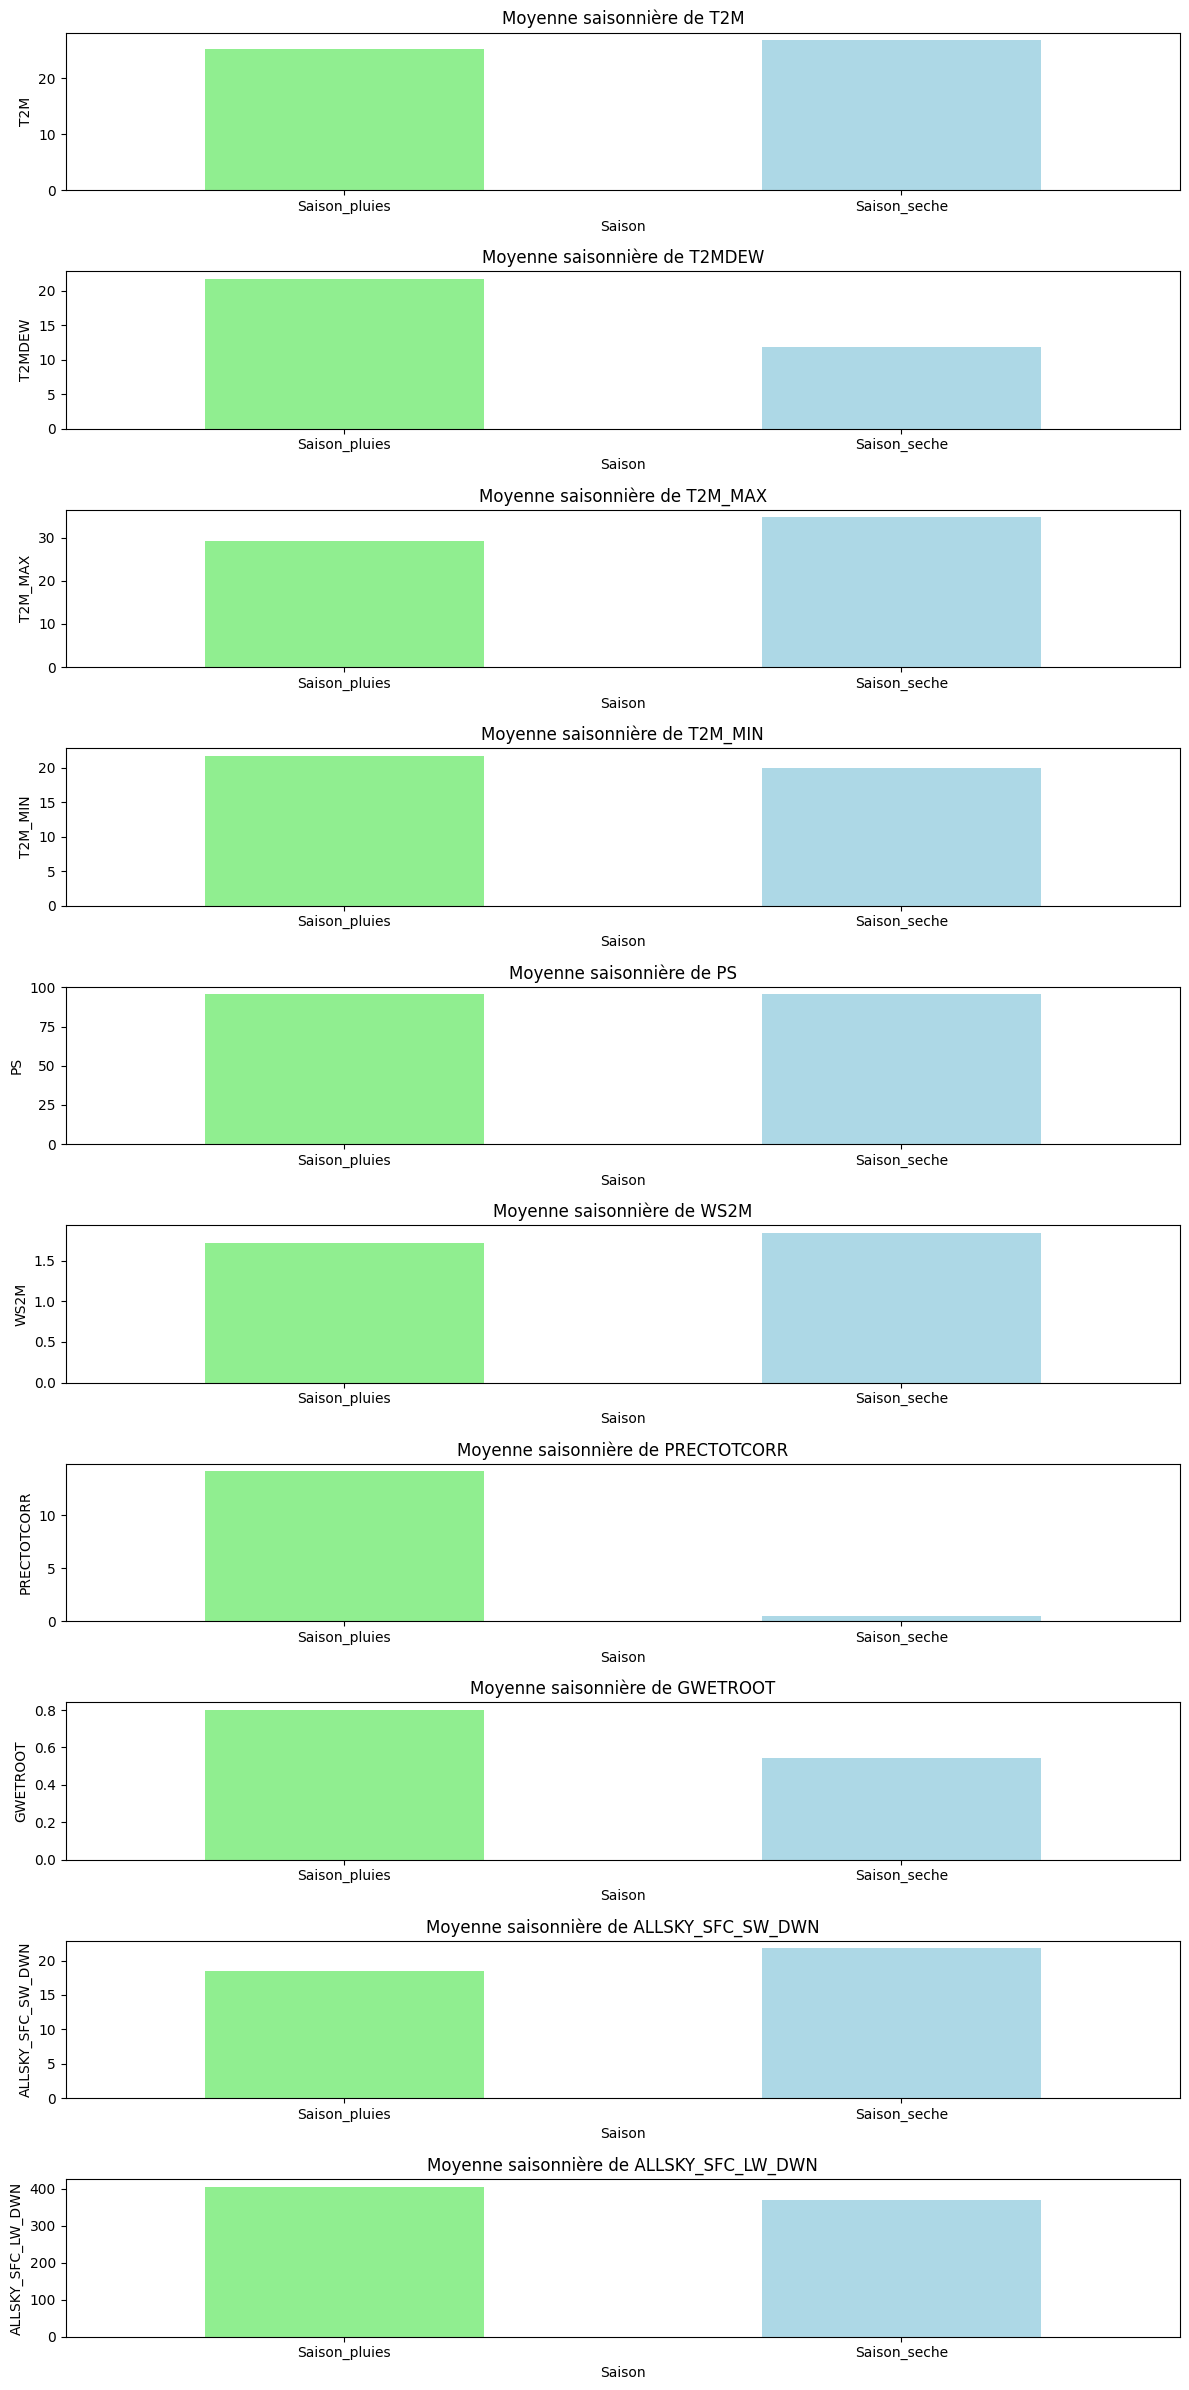

In [ ]:

numeric_columns = ['T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'PS', 'WS2M',
                   'PRECTOTCORR', 'GWETROOT','ALLSKY_SFC_SW_DWN','ALLSKY_SFC_LW_DWN']


# Calculer les moyennes par saison pour chaque variable numérique
seasonal_trends_all = df.groupby('Saison')[numeric_columns].mean()

# Visualisation des moyennes par saison pour chaque variable
# Plotting the seasonal averages with distinct colors for each season
plt.figure(figsize=(12, 24))

# Color mapping for seasons
colors = {'Saison_seche': 'lightblue', 'Saison_pluies': 'lightgreen'}

# Plot each variable with season-specific colors
for i, var in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    seasonal_trends_all[var].plot(kind='bar', color=[colors[season] for season in seasonal_trends_all.index], rot=0)
    plt.title(f"Moyenne saisonnière de {var}")
    plt.xlabel("Saison")
    plt.ylabel(var)

# Adjust layout for better readability
plt.tight_layout()
plt.show()



En Moyenne Guinée :
•	Saison sèche : Plus chaude et stable, avec moins de nuages, ce qui entraîne une radiation solaire plus forte et une pression de surface plus élevée.
•	Saison des pluies : Plus fraîche, avec une humidité et des précipitations importantes, un point de rosée élevé, et une légère augmentation de la vitesse du vent.


on observe qu'il ya effectivement des outliers qu'on devra géré.

GWETROOT est celui qui a le plus de données manquantes mais quand on se refère au nombre de ligne maximales on peut les géré sans supprimer la colonne ni supprimer ses lignes.


#PREPARATION DES DONNÉES

#Detection et gestion de doublon

In [ ]:
has_duplicates = df.duplicated().any()
print("Présence de lignes dupliquées :", has_duplicates)


Présence de lignes dupliquées : False


#Suite

In [18]:
import pandas as pd
df=pd.read_csv("/content/df.csv")


In [19]:
# Add a 'Month' column based on DOY for grouping
df['Date'] = pd.to_datetime(df['YEAR'] * 1000 + df['DOY'], format='%Y%j')
df['Month'] = df['Date'].dt.month
df_Month = df[['Month', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN',
               'PS', 'WS2M', 'PRECTOTCORR', 'GWETROOT', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']]

#créons la variable saison
def assign_season_by_month(month):
    if 5 <= month <= 10:
        return 'Saison_pluies'
    else:
        return 'Saison_seche'

# Appliquer la fonction pour créer la colonne 'Saison' en utilisant 'Month'
df['Saison'] = df['Month'].apply(assign_season_by_month)



# Vérifier et convertir la colonne Saison en type catégorie, si nécessaire
if df['Saison'].dtype != 'category':
    df['Saison'] = df['Saison'].astype('category')
# Apply one-hot encoding to the 'Saison' column with drop_first=False to keep all categories distinct
df = pd.get_dummies(df, columns=['Saison'], drop_first=False)


In [20]:

# Supprimer la colonne 'Date' car elle est de type datetime
df = df.drop(columns=['Date'])

# Convertir les colonnes booléennes en numériques si nécessaire
df['Saison_Saison_pluies'] = df['Saison_Saison_pluies'].astype(int)
df['Saison_Saison_seche'] = df['Saison_Saison_seche'].astype(int)

#target

In [21]:
#On va caclucler irr qui est notre variable cible
#On va utiliser la méthode de Penman Montheit pour le calcul de l'évapotranspiration ET0
#Puis nous allons calculer ETC en multipliant ET0 par kc, mais comme kc est à 1 nous allons jsute considéré ET0
#Nous allons aussi cacluler l'humidié du sol, la variable GWETROOT nous donne en pourcentage sur 1 le niveau
#d'humidité du sol donc on va le multiplié par ET0 qui désigne combien en mm d'eau la plante a besoin
# pour savoir combien  d'eau la plante peut récupéré a partir de la terre puis le soustraire a ET0 et la précipitation
#ceci dimunuera notre quantité d'Irrigartion à éffectué.
def irr(df):
    # Variables:

    T2M = df['T2M'].values
    T2MDEW = df['T2MDEW'].values
    T2M_MAX = df['T2M_MAX'].values
    T2M_MIN = df['T2M_MIN'].values
    Rns = df['ALLSKY_SFC_SW_DWN'].values
    Rnl = df['ALLSKY_SFC_LW_DWN'].values
    patm = df['PS'].values
    u2 = df['WS2M'].values
    P = df['PRECTOTCORR'].values  # Précipitations totales corrigées
    pourcentage_humidite_Sol = df['GWETROOT'].values
    kc=1
    # Calcul de l'humidité de l'air saturé
    es = (0.6108 * np.exp((17.27 * T2M_MAX) / (T2M_MAX + 237.3)) +
          0.6108 * np.exp((17.27 * T2M_MIN) / (T2M_MIN + 237.3))) / 2

    # Calcul de la pression de vapeur actuelle
    ea = 0.6108 * np.exp((17.27 * T2MDEW) / (T2MDEW + 237.3))

    # Constante psychrométrique
    gamma = 0.665 * 10**-3 * patm

    # Calcul du flux de rayonnement net
    Rn = Rnl - Rns  # Flux de rayonnement net

    # Calcul de Δ
    delta = (4098 * es) / (237.3 + T2M)**2


    # Calcul de ET0
    ET0 = (0.408 * delta * Rn + gamma * (900 / (T2M + 273)) * u2 * (es - ea)) / (delta + gamma * (1 + 0.34 * u2))
    # ETC=ET0*kc et comme kc =1 donc ETC=ET0
    humidite_sol=ET0*pourcentage_humidite_Sol
    # Calcul de IRR
    IRR = ET0 - P - humidite_sol

    # Ajout IRR aonsu DataFrame
    df['IRR'] = IRR
    return df


In [22]:
df=irr(df)

In [23]:
df

,LAT,LON,YEAR,DOY,T2M,T2MDEW,T2M_MAX,T2M_MIN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,PS,WS2M,PRECTOTCORR,GWETROOT,Month,Saison_Saison_pluies,Saison_Saison_seche,IRR
0,10.25,-13.25,2020,1,24.87,11.90,33.43,17.74,20.67,360.43,98.03,1.61,0.00,0.53,1,0,1,45.329149
1,10.25,-12.75,2020,1,24.53,8.15,34.17,16.60,21.14,327.40,97.20,1.98,0.00,0.54,1,0,1,39.752264
2,10.25,-12.25,2020,1,23.35,6.59,33.13,15.52,21.14,327.40,96.19,2.45,0.00,0.54,1,0,1,38.283148
3,10.25,-11.75,2020,1,21.30,7.34,30.44,13.88,21.47,315.98,95.10,2.67,0.00,0.53,1,0,1,35.514478
4,10.25,-11.25,2020,1,19.97,8.64,28.90,11.97,21.47,315.98,95.09,2.31,0.00,0.56,1,0,1,32.625592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55515,11.75,-11.75,2024,274,24.65,22.27,28.40,21.43,16.71,415.40,94.77,1.40,3.64,NaN,9,1,0,NaN
55516,11.75,-11.25,2024,274,25.08,22.39,28.75,21.83,16.71,415.40,95.20,1.41,3.07,NaN,9,1,0,NaN
55517,11.75,-10.75,2024,274,25.55,22.63,29.42,22.00,20.66,423.88,95.84,1.37,2.84,NaN,9,1,0,NaN
55518,11.75,-10.25,2024,274,25.66,22.76,29.48,21.93,20.66,423.88,96.12,1.38,2.91,NaN,9,1,0,NaN


In [24]:
#j'ai envie de savoir la corrélation des autres variables par rapport à IRR
df_num = df.select_dtypes(include=['number'])
corr_matrix = df_num.corr()
corr_matrix["IRR"].sort_values(ascending=False)

,IRR
IRR,1.000000
T2M_MAX,0.773758
T2M,0.618872
Saison_Saison_seche,0.563744
ALLSKY_SFC_SW_DWN,0.478336
WS2M,0.181589
YEAR,0.131598
LON,0.102839
LAT,0.096035
T2M_MIN,0.062413


#Detection  et suppression des données manquantes(ne pas executer la partie suppression des données manquantes dans le cas ou on decide de gerer les données manquantes par une méthode)

In [ ]:
df_Nan = df[['T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'PS', 'WS2M', 'PRECTOTCORR', 'GWETROOT', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']]
# Vérifions  si des valeurs manquantes existent
df_Nan.isnull().sum()

,0
T2M,96
T2MDEW,96
T2M_MAX,96
T2M_MIN,96
PS,96
WS2M,96
PRECTOTCORR,96
GWETROOT,2912
ALLSKY_SFC_SW_DWN,0
ALLSKY_SFC_LW_DWN,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
LAT,0
LON,0
YEAR,0
DOY,0
T2M,0
T2MDEW,0
T2M_MAX,0
T2M_MIN,0
ALLSKY_SFC_SW_DWN,0
ALLSKY_SFC_LW_DWN,0


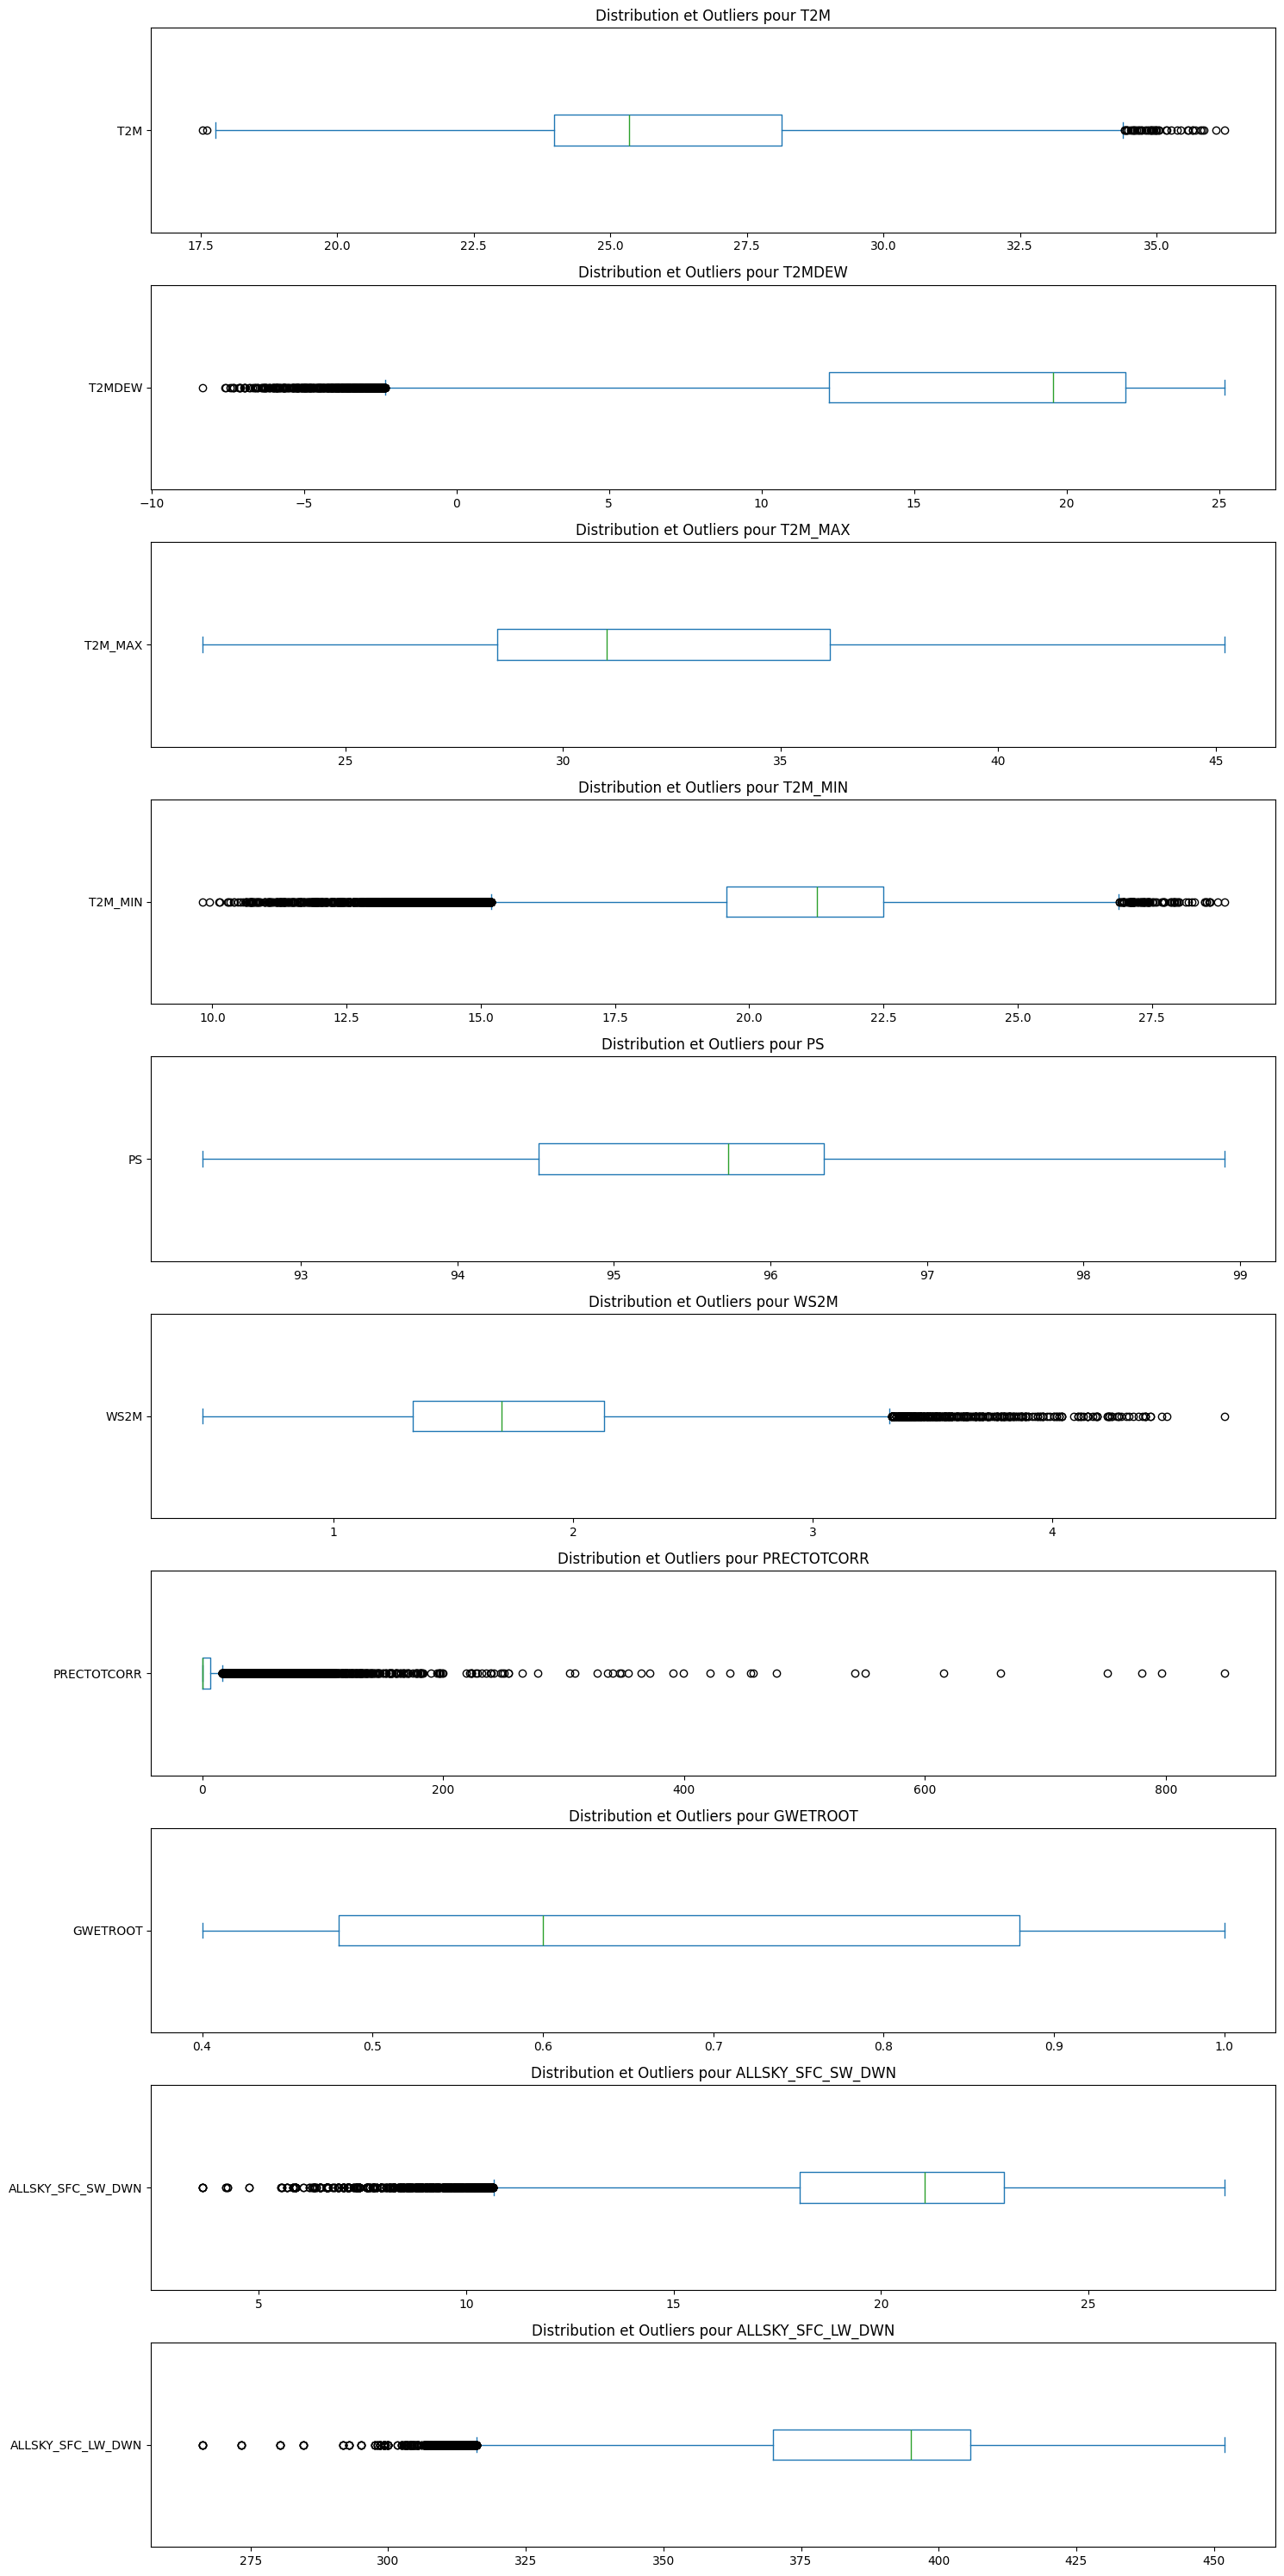

In [ ]:
import matplotlib.pyplot as plt

# Variables principales pour l'analyse des outliers
numeric_columns = ['T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'PS', 'WS2M', 'PRECTOTCORR', 'GWETROOT','ALLSKY_SFC_SW_DWN','ALLSKY_SFC_LW_DWN']

# Visualisation des distributions et détection des valeurs extrêmes par boîte à moustaches
plt.figure(figsize=(15, 30))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    df[col].plot(kind='box', vert=False)
    plt.title(f"Distribution et Outliers pour {col}")

plt.tight_layout()
plt.show()


#split et gestion des outliers

In [25]:
def remove_outliers(x: pd.DataFrame) -> pd.DataFrame:
    cols = x.columns
    Q25 = x[cols].quantile(0.25)  # Q1 (premier quartile)
    Q75 = x[cols].quantile(0.75)  # Q3 (troisième quartile)
    IQR = Q75 - Q25
    SeuilMin = Q25 - 1.5 * IQR
    SeuilMax = Q75 + 1.5 * IQR
    # Filtrage des lignes sans outliers
    df_filtered = x.apply(lambda col: col[(col >= SeuilMin[col.name]) & (col <= SeuilMax[col.name])])
    return df_filtered.dropna()
def replace_outliers_with_mean(x: pd.DataFrame) -> pd.DataFrame:
    Q25 = x.quantile(0.25)  # Q1
    Q75 = x.quantile(0.75)  # Q3
    IQR = Q75 - Q25
    SeuilMin = Q25 - 1.5 * IQR
    SeuilMax = Q75 + 1.5 * IQR
    mean_values = x.mean()

    # Remplacement des outliers
    df_outliers_replaced = x.apply(
        lambda col: col.where((col >= SeuilMin[col.name]) & (col <= SeuilMax[col.name]), mean_values[col.name])
    )
    return df_outliers_replaced
def replace_outliers_with_median(x: pd.DataFrame) -> pd.DataFrame:
    """
    Remplace les outliers par la médiane en utilisant les bornes de l'IQR.
    """
    Q25 = x.quantile(0.25)  # Q1
    Q75 = x.quantile(0.75)  # Q3
    IQR = Q75 - Q25
    SeuilMin = Q25 - 1.5 * IQR
    SeuilMax = Q75 + 1.5 * IQR
    median_values = x.median()

    # Remplacement des outliers
    df_outliers_replaced = x.apply(
        lambda col: col.where((col >= SeuilMin[col.name]) & (col <= SeuilMax[col.name]), median_values[col.name])
    )
    return df_outliers_replaced
def replace_outliers_with_interpolation(x: pd.DataFrame) -> pd.DataFrame:
    """
    Remplace les outliers par des valeurs interpolées en utilisant les bornes de l'IQR.
    """
    Q25 = x.quantile(0.25)  # Q1
    Q75 = x.quantile(0.75)  # Q3
    IQR = Q75 - Q25
    SeuilMin = Q25 - 1.5 * IQR
    SeuilMax = Q75 + 1.5 * IQR

    # Marquer les outliers comme NaN
    df_with_nans = x.apply(
        lambda col: col.where((col >= SeuilMin[col.name]) & (col <= SeuilMax[col.name]), np.nan)
    )

    # Remplacer les NaN par interpolation
    df_outliers_replaced = df_with_nans.interpolate(method='linear', axis=0)

    return df_outliers_replaced
# Fonction pour la méthode de campement
def apply_camping_method(data, lower_quantile=0.01, upper_quantile=0.99):
    """
    Applique la méthode de campement sur les données en limitant
    les valeurs aux quantiles spécifiés.
    """
    lower_bound = np.quantile(data, lower_quantile, axis=0)
    upper_bound = np.quantile(data, upper_quantile, axis=0)
    return np.clip(data, lower_bound, upper_bound)


In [26]:
# Normalisation des fonctionnalités uniquement
feature_scaler = MinMaxScaler()
df_features_scaled = feature_scaler.fit_transform(df.drop(columns=['IRR']))  # Supposons que 'IRR' est la colonne cible

# Normalisation de la cible uniquement
target_scaler = MinMaxScaler()
df_target_scaled = target_scaler.fit_transform(df[['IRR']])  # Notez le double crochet pour garder un DataFrame

# Conversion en DataFrame normalisé pour la cible et les features
df_scaled = pd.DataFrame(df_features_scaled, columns=df.drop(columns=['IRR']).columns)
df_scaled['IRR'] = df_target_scaled  # Ajout de la colonne cible normalisée

# Division Train, Validation (Test)
train_size = int(len(df_scaled) * 0.8)  # 80% pour l'entraînement
test = len(df_scaled) - train_size  # 20% pour validation (test)

# Division des données en train et test
train_data = df_scaled.iloc[:train_size]  # 80% des données pour l'entraînement
test_data = df_scaled.iloc[train_size:]   # 20% des données pour le test (validation)

############################################################################################
#a executer uniquement si on doit gerer les nan
######################################################################################
# Interpolation for train_data
train_data=train_data.interpolate(method='linear', limit_direction='forward', axis=0)

# supprimons les nan de lensemble test
test_data=test_data.dropna()
#################################################################################
# Préparation des fonctionnalités (features) et des cibles (target)
target_column = 'IRR'  # Nom de la colonne cible
X_train = train_data.drop(columns=[target_column])  # Features d'entraînement (DataFrame Pandas)
y_train = train_data[[target_column]]  # Cible d'entraînement (en DataFrame pour scaler)

X_test = test_data.drop(columns=[target_column])  # Features de test (DataFrame Pandas)
y_test = test_data[[target_column]]  # Cible de test (en DataFrame pour scaler)



# Appliquer la méthode de campement uniquement sur les données d'entraînement
X_train_camp = apply_camping_method(X_train, lower_quantile=0.01, upper_quantile=0.99)
y_train_camp = apply_camping_method(y_train, lower_quantile=0.01, upper_quantile=0.99)
X_train_moy = replace_outliers_with_mean(X_train)
y_train_moy = replace_outliers_with_mean(y_train)
X_train_median = replace_outliers_with_median(X_train)
y_train_median = replace_outliers_with_median(y_train)
X_train_inter = replace_outliers_with_interpolation(X_train)
y_train_inter = replace_outliers_with_interpolation(y_train)
# Reshape explicite pour les données d'entraînement
X_train_m = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = y_train.values.reshape(-1, 1)  # y_train en 2D si nécessaire

# Reshape explicite pour les données de test
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = y_test.values.reshape(-1, 1)  # y_test en 2D si nécessaire

# Convertir les données X_train et y_train en format compatible avec XGBoost
#X_train_camp = X_train_camp.squeeze()  # Enlever la dernière dimension inutilisée pour XGBoost
y_train_camp = y_train_camp.squeeze()  # Enlever la dernière dimension inutilisée pour y_train
X_train_moy = X_train_moy.squeeze()  # Enlever la dernière dimension inutilisée pour XGBoost
y_train_moy = y_train_moy.squeeze()  # Enlever la dernière dimension inutilisée pour y_train
X_train_median = X_train_median.squeeze()  # Enlever la dernière dimension inutilisée pour XGBoost
y_train_median = y_train_median.squeeze()  # Enlever la dernière dimension inutilisée pour y_train
X_train_inter = X_train_inter.squeeze()  # Enlever la dernière dimension inutilisée pour XGBoost
y_train_inter = y_train_inter.squeeze()  # Enlever la dernière dimension inutilisée pour y_train
X_test=X_test.squeeze()
y_test=y_test.squeeze()


##split et gestion des Na et outliers

# xgboost  avec gestion outier:

par moyenne

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Initialize the XGBRegressor with best hyperparameters
final_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    objective='reg:squarederror'  # Objective for regression
)

final_model.fit(X_train_moy, y_train_moy)

train_predictions = final_model.predict(X_train_moy)

# Calculate regression metrics
rmse = mean_squared_error(y_train_moy, train_predictions, squared=False)
mae = mean_absolute_error(y_train_moy, train_predictions)
mse = mean_squared_error(y_train_moy, train_predictions)
r2 = r2_score(y_train_moy, train_predictions)

print("Train RMSE:", rmse)
print("Train MAE:", mae)
print("Train MSE:", mse)
print("Train R² Score:", r2)

Train RMSE: 0.004450835230800911
Train MAE: 0.001465996106027091
Train MSE: 1.98099342517386e-05
Train R² Score: 0.9794084025758725


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
# Predict on the test set
test_predictions = final_model.predict(X_test)

# Calculate regression metrics
rmse = mean_squared_error(y_test, test_predictions, squared=False)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("test RMSE:", rmse)
print("test MAE:", mae)
print("test MSE:", mse)
print("test R² Score:", r2)

test RMSE: 0.005635187552370684
test MAE: 0.0013420790930820932
test MSE: 3.1755338750393496e-05
test R² Score: 0.9407808923429245


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


par median

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Initialize the XGBRegressor with best hyperparameters
final_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    objective='reg:squarederror'  # Objective for regression
)

final_model.fit(X_train_median, y_train_median)

train_predictions = final_model.predict(X_train_median)

# Calculate regression metrics
rmse = mean_squared_error(y_train_median, train_predictions, squared=False)
mae = mean_absolute_error(y_train_median, train_predictions)
mse = mean_squared_error(y_train_median, train_predictions)
r2 = r2_score(y_train_median, train_predictions)

print("Train RMSE:", rmse)
print("Train MAE:", mae)
print("Train MSE:", mse)
print("Train R² Score:", r2)

Train RMSE: 0.004525300386350892
Train MAE: 0.0014892190619923153
Train MSE: 2.0478343586707533e-05
Train R² Score: 0.9787204814708526


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
# Predict on the test set
test_predictions = final_model.predict(X_test)

# Calculate regression metrics
rmse = mean_squared_error(y_test, test_predictions, squared=False)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("test RMSE:", rmse)
print("test MAE:", mae)
print("test MSE:", mse)
print("test R² Score:", r2)

test RMSE: 0.005768901260353527
test MAE: 0.0015439943221241732
test MSE: 3.328022175170851e-05
test R² Score: 0.9379372063936382


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


par interpolation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Initialize the XGBRegressor with best hyperparameters
final_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    objective='reg:squarederror'  # Objective for regression
)

final_model.fit(X_train_inter, y_train_inter)

train_predictions = final_model.predict(X_train_inter)

# Calculate regression metrics
rmse = mean_squared_error(y_train_inter, train_predictions, squared=False)
mae = mean_absolute_error(y_train_inter, train_predictions)
mse = mean_squared_error(y_train_inter, train_predictions)
r2 = r2_score(y_train_inter, train_predictions)

print("Train RMSE:", rmse)
print("Train MAE:", mae)
print("Train MSE:", mse)
print("Train R² Score:", r2)

Train RMSE: 0.003963965747282102
Train MAE: 0.0017696630499396443
Train MSE: 1.5713024445625754e-05
Train R² Score: 0.9844778825451226


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


test

In [32]:
# Predict on the test set
test_predictions = final_model.predict(X_test)

# Calculate regression metrics
rmse = mean_squared_error(y_test, test_predictions, squared=False)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("test RMSE:", rmse)
print("test MAE:", mae)
print("test MSE:", mse)
print("test R² Score:", r2)

test RMSE: 0.005688706781414524
test MAE: 0.0017194001262282022
test MSE: 3.236138484491159e-05
test R² Score: 0.9396507041500503


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


par campement

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Initialize the XGBRegressor with best hyperparameters
final_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    objective='reg:squarederror'  # Objective for regression
)

final_model.fit(X_train_camp, y_train_camp)

train_predictions = final_model.predict(X_train_camp)

# Calculate regression metrics
rmse = mean_squared_error(y_train_camp, train_predictions, squared=False)
mae = mean_absolute_error(y_train_camp, train_predictions)
mse = mean_squared_error(y_train_camp, train_predictions)
r2 = r2_score(y_train_camp, train_predictions)

print("Train RMSE:", rmse)
print("Train MAE:", mae)
print("Train MSE:", mse)
print("Train R² Score:", r2)

Train RMSE: 0.0003889264196269725
Train MAE: 0.00027661938996479817
Train MSE: 1.512637598838559e-07
Train R² Score: 0.9998612441058591


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
# Predict on the test set
test_predictions = final_model.predict(X_test)

# Calculate regression metrics
rmse = mean_squared_error(y_test, test_predictions, squared=False)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("test RMSE:", rmse)
print("test MAE:", mae)
print("test MSE:", mse)
print("test R² Score:", r2)

test RMSE: 0.0013252147385645892
test MAE: 0.0005563381453064554
test MSE: 1.7561941033088127e-06
test R² Score: 0.9967249523461853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
